# TASK5: SALES PREDICTION USING PYTHON

TASK DESCRIPTION: Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python

# Loading the DataSet

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [24]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [25]:
df.head(15)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [106]:
 df.tail(15)

,Unnamed: 0,TV,Radio,Newspaper,Sales
185,186,205.0,45.1,19.6,22.6
186,187,139.5,2.1,26.6,10.3
187,188,191.1,28.7,18.2,17.3
188,189,286.0,13.9,3.7,15.9
189,190,18.7,12.1,23.4,6.7
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3


# Data Preprocessing

In [27]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [85]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.001835,-0.095839,-0.152980,-0.054983
TV,0.001835,1.000000,0.070843,0.061320,0.782440
Radio,-0.095839,0.070843,1.000000,0.362191,0.588494
Newspaper,-0.152980,0.061320,0.362191,1.000000,0.251373
Sales,-0.054983,0.782440,0.588494,0.251373,1.000000


In [86]:
df[:10]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


# Data Specifications

In [28]:
df.shape

(200, 5)

In [29]:
df.size

1000

In [30]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [51]:
df=df[data['Newspaper']<=90]
df.shape 

C:\Users\dhana\AppData\Local\Temp\ipykernel_21236\2110648780.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[data['Newspaper']<=90]


(196, 5)

In [104]:
df=df[data['Radio']<=90]
df.shape

C:\Users\dhana\AppData\Local\Temp\ipykernel_21236\4138617924.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[data['Radio']<=90]


(196, 5)

In [52]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.001835,-0.095839,-0.152980,-0.054983
TV,0.001835,1.000000,0.070843,0.061320,0.782440
Radio,-0.095839,0.070843,1.000000,0.362191,0.588494
Newspaper,-0.152980,0.061320,0.362191,1.000000,0.251373
Sales,-0.054983,0.782440,0.588494,0.251373,1.000000


# Visualizing The Data

# ScatterPlot

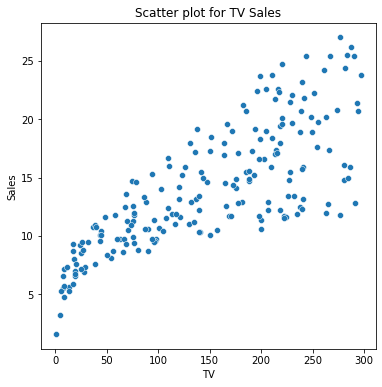

In [43]:
#TV SALES
plt.figure(figsize=(6,6))
sns.scatterplot(data = df, x = df['TV'], y = df['Sales'])
plt.title("Scatter plot for TV Sales")
plt.show()

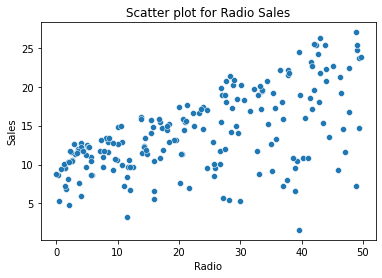

In [87]:
#RADIO SALES
plt.figure(figsize=(6,6))
sns.scatterplot(data = df, x = df['Radio'], y = df['Sales'])
plt.title("Scatter plot for Radio Sales")
plt.show()

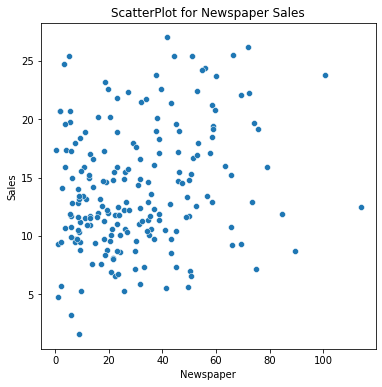

In [44]:
#NEWSPAPER SALES
plt.figure(figsize=(6,6))
sns.scatterplot(data = df, x = df['Newspaper'], y = df['Sales'])
plt.title("ScatterPlot for Newspaper Sales")
plt.show()

# PairPlot

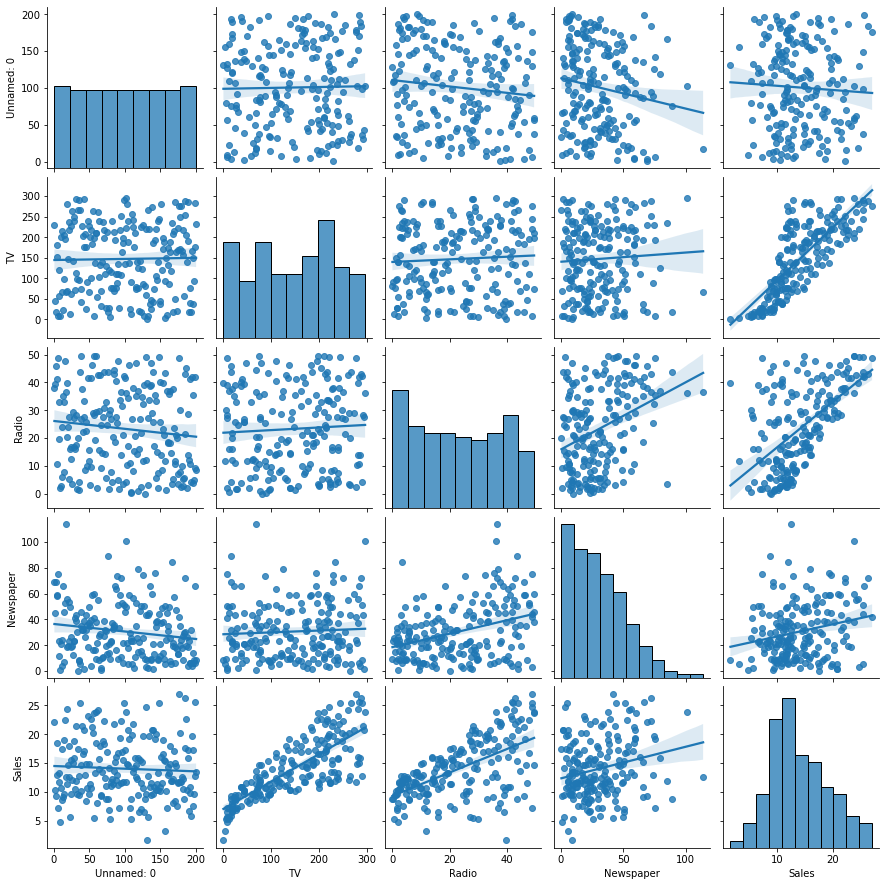

In [45]:
sns.pairplot(df,kind="reg");

# BoxPlot

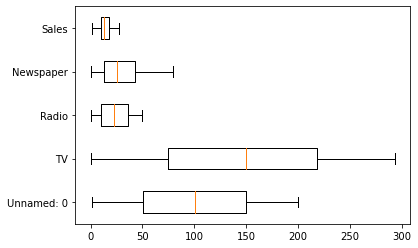

In [66]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

# TRAINING AND TESTING 

In [55]:
x=data.drop(columns=['Sales'])
y=data['Sales']

In [67]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

# Training the Model

In [68]:
x_train.tail()

,Unnamed: 0,TV,Radio,Newspaper
78,79,5.4,29.9,9.4
82,83,75.3,20.3,32.5
41,42,177.0,33.4,38.7
39,40,228.0,37.7,32.0
129,130,59.6,12.0,43.1


In [69]:
y_train.tail()

78      5.3
82     11.3
41     17.1
39     21.5
129     9.7
Name: Sales, dtype: float64

In [70]:
xtrain,ytrain

(     Unnamed: 0     TV  Radio  Newspaper
 71           72  109.8   14.3       31.7
 90           91  134.3    4.9        9.3
 100         101  222.4    4.3       49.8
 44           45   25.1   25.7       43.3
 94           95  107.4   14.0       10.9
 ..          ...    ...    ...        ...
 58           59  210.8   49.6       37.7
 21           22  237.4    5.1       23.5
 49           50   66.9   11.7       36.8
 64           65  131.1   42.8       28.9
 68           69  237.4   27.5       11.0
 
 [140 rows x 4 columns],
 71     12.4
 90     11.2
 100    11.7
 44      8.5
 94     11.5
        ... 
 58     23.8
 21     12.5
 49      9.7
 64     18.0
 68     18.9
 Name: Sales, Length: 140, dtype: float64)

# Testing the model

In [71]:
xtest,ytest

(     Unnamed: 0     TV  Radio  Newspaper
 56           57    7.3   28.1       41.4
 37           38   74.7   49.4       45.7
 67           68  139.3   14.5       10.2
 79           80  116.0    7.7       23.1
 80           81   76.4   26.7       22.3
 188         189  286.0   13.9        3.7
 183         184  287.6   43.0       71.8
 10           11   66.1    5.8       24.2
 128         129  220.3   49.0        3.2
 62           63  239.3   15.5       27.3
 65           66   69.0    9.3        0.9
 17           18  281.4   39.6       55.8
 133         134  219.8   33.5       45.1
 195         196   38.2    3.7       13.8
 146         147  240.1    7.3        8.7
 38           39   43.1   26.7       35.1
 173         174  168.4    7.1       12.8
 149         150   44.7   25.8       20.6
 93           94  250.9   36.5       72.3
 29           30   70.6   16.0       40.8
 0             1  230.1   37.8       69.2
 2             3   17.2   45.9       69.3
 122         123  224.0    2.4    

# Linear Regression

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. 
Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables.

In [90]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
m = LinearRegression()

In [91]:
m.fit(xtrain,ytrain)

LinearRegression()

In [93]:
#Array matrix of y
ypredictor=m.predict(xtest)
ypredictor

array([ 8.45702906, 15.41567477, 12.11986311,  9.78015386, 11.40021439,
       18.66380242, 23.85921359,  7.1994201 , 22.04944855, 16.86256341,
        7.97056214, 23.13450466, 19.12525491,  5.40353655, 15.38483985,
        9.87764861, 12.02226778,  9.72605661, 21.07155934,  9.19983821,
       20.43660603, 12.11812846, 13.7634414 , 10.66955398, 16.20035398,
        7.75241463, 20.55644145, 20.37041629,  9.01287061, 14.20987829,
       17.36476206, 15.18473556, 17.23241729, 19.0330459 , 17.07433237,
       12.23183761, 12.82251434,  6.01188321, 10.01961798, 13.4334721 ,
       12.00389104,  9.67557171,  5.31805054, 10.16734236, 14.17333678,
       13.9779146 , 14.26664617, 10.46571715, 21.07601543, 13.77260966,
        6.53092968,  7.88077422, 17.69002982, 17.74360823, 12.34522223,
       12.77106524, 20.65691401, 18.37955936,  4.61743793,  6.81155332])

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
a=m.score(xtrain,ytrain)*100
b=m.score(xtest,ytest)*100
c=mean_squared_error(ytest,ypredictor)
d=mean_absolute_error(ytest,ypredictor)
e=r2_score(ytest,ypredictor)*100
print(a)
print(b)
print(c)
print(d)
print(e)

88.44995280307614
92.21466687140841
2.2395243863263303
1.218098856177203
92.21466687140841


In [103]:
#Root Mean Square Error
rmse = np.sqrt(c)
rmse

1.4965040548980582

# LASSO REGRESSION

Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters, thus helping in the concentration of selection and regularizes the models.

In [76]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9205704587485745

In [77]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [78]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [88]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'normalize': ['deprecated'],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [89]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [79]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.9205704587485745